In [1]:
import json
import pandas as pd
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
 

 



In [2]:
# Opening JSON file
f = pd.read_json('result.json')


features_s = f['feature_vector']
fnames_s = f['fname']


features_v2 = []
new_name = []

In [3]:
for names in fnames_s:
    name = names[-19:]
    new_name.append(name)

new_name

['ISIC_0000448.nii.gz',
 'ISIC_0000295.nii.gz',
 'ISIC_0001852.nii.gz',
 'ISIC_0002246.nii.gz',
 'ISIC_0000087.nii.gz',
 'ISIC_0012710.nii.gz',
 'ISIC_0012725.nii.gz',
 'ISIC_0012740.nii.gz',
 'ISIC_0012705.nii.gz',
 'ISIC_0012708.nii.gz',
 'ISIC_0012706.nii.gz',
 'ISIC_0012721.nii.gz',
 'ISIC_0012741.nii.gz',
 'ISIC_0012756.nii.gz',
 'ISIC_0012715.nii.gz',
 'ISIC_0012720.nii.gz',
 'ISIC_0012719.nii.gz',
 'ISIC_0012739.nii.gz',
 'ISIC_0012758.nii.gz',
 'ISIC_0012786.nii.gz',
 'ISIC_0012726.nii.gz',
 'ISIC_0012737.nii.gz',
 'ISIC_0012735.nii.gz',
 'ISIC_0012749.nii.gz',
 'ISIC_0012789.nii.gz',
 'ISIC_0012806.nii.gz',
 'ISIC_0012742.nii.gz',
 'ISIC_0012746.nii.gz',
 'ISIC_0012744.nii.gz',
 'ISIC_0012777.nii.gz',
 'ISIC_0012810.nii.gz',
 'ISIC_0012828.nii.gz',
 'ISIC_0012768.nii.gz',
 'ISIC_0012773.nii.gz',
 'ISIC_0012770.nii.gz',
 'ISIC_0012804.nii.gz',
 'ISIC_0012835.nii.gz',
 'ISIC_0012852.nii.gz',
 'ISIC_0012792.nii.gz',
 'ISIC_0012803.nii.gz',
 'ISIC_0012793.nii.gz',
 'ISIC_0012826.n

In [4]:
fnames_v2 = np.array(new_name)
fnames_v2.shape

(2286,)

In [5]:
for feature in features_s:
    new_feature = np.array(feature)
    features_v2.append(new_feature)

In [6]:
features_v2_array = np.array(features_v2)

In [7]:
features_v2_array.shape

(2286, 1, 480, 7, 6)

In [12]:
new_arr = features_v2_array.reshape(2286,-1)

In [13]:
new_arr.shape

(2286, 20160)

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(new_arr)


pca = PCA(n_components = 0.95)
pca.fit(new_arr)
reduced = pca.transform(new_arr)
reduced.shape

(2286, 113)

In [15]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(reduced)

KMeans(n_clusters=2)

In [16]:
Kmean.labels_

array([0, 1, 0, ..., 0, 1, 1])

In [17]:
groups = {}
for file, cluster in zip(fnames_v2,Kmean.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [18]:
len(groups[1])

848

In [19]:
len(groups[0])

1438

In [20]:
labels = Kmean.labels_

In [22]:
from sklearn.cluster import KMeans
 
label = Kmean.fit_predict(reduced)
 
print(label)

[0 1 0 ... 0 1 1]


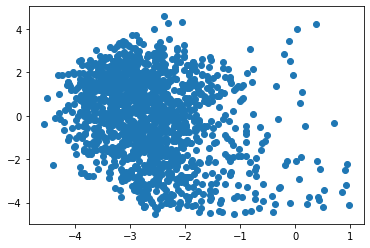

In [23]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = reduced[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

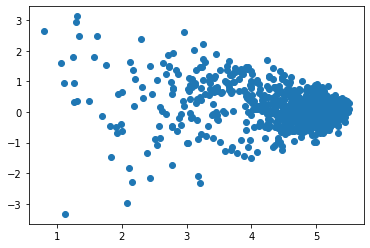

In [25]:
#filter rows of original data
filtered_label1 = reduced[label == 1]
 
#plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.show()

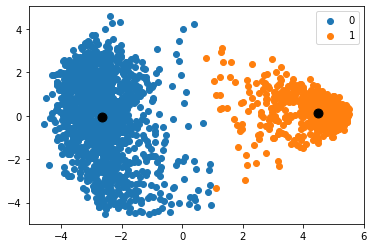

In [27]:
#Getting the Centroids
centroids = Kmean.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(reduced[label == i , 0] , reduced[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

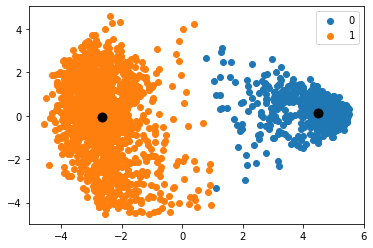

In [29]:
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = Kmean.fit_predict(reduced)
 
centroids = Kmean.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(reduced[label == i , 0] , reduced[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

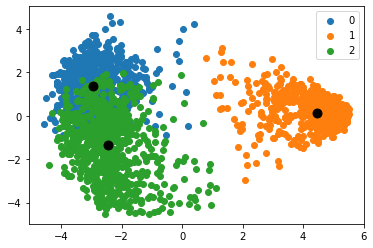

In [30]:
from sklearn.cluster import MiniBatchKMeans
MBKmeans = MiniBatchKMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = MBKmeans.fit_predict(reduced)
 
centroids = MBKmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(reduced[label == i , 0] , reduced[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

## Po więcej zapraszam na:
https://machinelearningmastery.com/clustering-algorithms-with-python/